# Exploratory analysis 

The propose of this notebook is to dig deeper into the dataset. There are more than 300 million
transactions provided that were sampled into a 3 million dataset to be evaluated before getting to the full data.

The preprocess script to create this sample is in the root folder of this project and is divided into two parts:
   
   - **data-cleaner:** responsible for removing unecessary columns and converting the csv files to `utf-8` encoding.
   - **data-sampler:** responsible for splitting the data into samaller sets and collecting 15 out of each 100 records.

This plots and insights will be used to provide a better undestanding of the overall data and its complexity in order
to create processes and evaluating techniques to better fit the data.

## Loading data

The data were exported in a naive way. This leads to difficulty into loading the types correctly by `pandas`. In orther to fix this, we have to load the dataset, and manually parse numeric columns to the right type. This is a simpler approach than trying to fix each of the 3 million rows of the csv file, but encreases the load type by almost a half.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

numeric_cols = ['QT_DISPENSACAO', 'VL_UNITARIO', 'CO_PESSOA', 'CO_ANO_NASCIMENTO', 'CO_MUNICIPIO_IBGE_PAC', 'QT_POPULACA_PORTARIA_1555_2013', 'QT_MAXIMA', 'QT_USUAL', 'NU_ALTITUDE_MUN_PAC', 'NU_ALTITUDE_MUN_EST', 'NU_REGISTRO_ANVISA', 'VL_PRECO_SUBSIDIADO', 'QT_PRESCRITA', 'QT_SOLICITADA', 'QT_ESTORNADA']
date_cols = ['DT_DISPENSACAO']

data = pd.read_csv('./sample.csv', delimiter=';',index_col='CO_SEQ_DISPENSACAO', parse_dates=date_cols, low_memory=False)
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
data.sample(n=10)

,CO_SEQ_ESTABELECIMENTO,DT_DISPENSACAO,QT_DISPENSACAO,VL_UNITARIO,ST_VIVO,CO_PESSOA,CO_ANO_NASCIMENTO,SG_SEXO_PACIENTE,CO_MUNICIPIO_IBGE_PAC,CO_AGLOMERADO_URBANO_PAC,...,QT_POPULACA_PORTARIA_1555_2013,CO_AGLOMERADO_URBANO_EST,CO_MACRORREGIONAL_SAUDE_EST,CO_MESORREGIAO_EST,CO_MICRORREGIAO_EST,CO_MICRORREGIONAL_SAUDE_EST,SG_UF_EST,NU_ALTITUDE_MUN_EST,NU_UF_LONGITUDE_EST,NU_LONGITUDE_MUN_EST
CO_SEQ_DISPENSACAO,,,,,,,,,,,,,,,,,,,,,
249100925,93325,10/09/18,60.0,0.080000,S,284947591.0,1956.0,M,330330.0,3301,...,13983.0,4190,4103,4107,41025,41900,PR,400.0,-49.27056,-53.76600
112141506,12838,07/04/18,30.0,0.070000,S,21495836.0,1954.0,M,351370.0,3590,...,41642.0,4390,4302,4305,43027,43900,RS,16.0,-51.22480,-50.27000
266137690,262004,11/04/18,30.0,0.050000,S,254371993.0,1941.0,M,330455.0,3301,...,75249.0,2390,2314,2304,23018,23900,CE,274.0,-38.53926,-40.67800
251808939,270395,14/09/18,30.0,0.060000,S,63071141.0,1954.0,F,420550.0,4290,...,255448.0,5101,5107,5104,51017,51900,MT,190.0,-56.09147,-56.13300
245721146,254408,04/10/18,90.0,0.053333,S,171388849.0,1945.0,M,150010.0,1590,...,257746.0,4301,4302,4305,43026,43900,RS,57.0,-51.22480,-51.13100
190063568,255255,13/03/18,60.0,0.300000,S,166051178.0,1960.0,M,210005.0,2190,...,7012.0,3510,3514,3502,35014,35132,SP,512.0,-46.63503,-48.03800
101218350,281179,29/06/18,20.0,1.285000,S,234546246.0,1952.0,F,355030.0,3501,...,1318148.0,5201,5213,5203,52010,52900,GO,749.0,-49.25237,-49.25400
275609062,266437,09/06/18,30.0,0.050000,S,136613162.0,1938.0,F,230185.0,2390,...,15222.0,2990,2908,2906,29026,29082,BA,765.0,-38.50661,-42.71400
247129662,4031,07/10/18,60.0,0.179667,S,35170187.0,1980.0,F,250480.0,2590,...,191886.0,3508,3514,3506,35026,35104,SP,625.0,-46.63503,-47.56100


In [3]:
data.drop_duplicates(inplace=True)
data = data.replace(to_replace=-1,value=0)
data.sample(n=10)

,CO_SEQ_ESTABELECIMENTO,DT_DISPENSACAO,QT_DISPENSACAO,VL_UNITARIO,ST_VIVO,CO_PESSOA,CO_ANO_NASCIMENTO,SG_SEXO_PACIENTE,CO_MUNICIPIO_IBGE_PAC,CO_AGLOMERADO_URBANO_PAC,...,QT_POPULACA_PORTARIA_1555_2013,CO_AGLOMERADO_URBANO_EST,CO_MACRORREGIONAL_SAUDE_EST,CO_MESORREGIAO_EST,CO_MICRORREGIAO_EST,CO_MICRORREGIONAL_SAUDE_EST,SG_UF_EST,NU_ALTITUDE_MUN_EST,NU_UF_LONGITUDE_EST,NU_LONGITUDE_MUN_EST
CO_SEQ_DISPENSACAO,,,,,,,,,,,,,,,,,,,,,
104345232,160298,27/08/18,30.0,0.026667,S,295723303.0,1956.0,F,355030.0,3501,...,25922.0,5190,5110,5105,51021,51900,MT,367.0,-56.09147,-54.96800
108599584,257501,15/06/18,30.0,0.075000,S,52131610.0,1960.0,F,230420.0,2302,...,14452.0,2690,2611,2602,26006,26011,PE,280.0,-34.87548,-38.26900
107001636,271536,09/04/18,60.0,0.023333,S,238148863.0,1957.0,M,330170.0,3301,...,281583.0,3508,3514,3506,35027,35102,SP,588.0,-46.63503,-47.40200
190608901,255033,10/04/18,30.0,0.080000,S,6144821.0,1966.0,F,412770.0,4102,...,25236.0,3590,3511,3508,35036,35112,SP,487.0,-46.63503,-51.50000
101576161,192747,27/08/18,10.0,0.796667,S,264838768.0,1940.0,F,351640.0,3501,...,14181.0,4390,4302,4305,43025,43900,RS,69.0,-51.22480,-51.72900
247130080,5968,07/10/18,60.0,0.179667,S,226305003.0,1979.0,M,280290.0,2890,...,6355949.0,3301,3314,3306,33018,33900,RJ,2.0,-43.20458,-43.20800
82552546,268799,02/01/18,30.0,0.060000,S,145897535.0,1965.0,F,292870.0,2990,...,252841.0,2302,2312,2307,23032,23900,CE,377.0,-38.53926,-39.31500
266337147,265692,18/04/18,30.0,0.050000,S,202889596.0,1966.0,M,314330.0,3190,...,11051.0,4290,4220,4206,42020,42900,SC,50.0,-48.54299,-49.76400
265557406,107996,20/03/18,30.0,0.060000,S,61367768.0,1945.0,F,420890.0,4205,...,810780.0,2401,2404,2404,24018,24900,RN,30.0,-35.20576,-35.20900


/Users/macbook-pro/.virtualenvs/capstone/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/macbook-pro/.virtualenvs/capstone/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


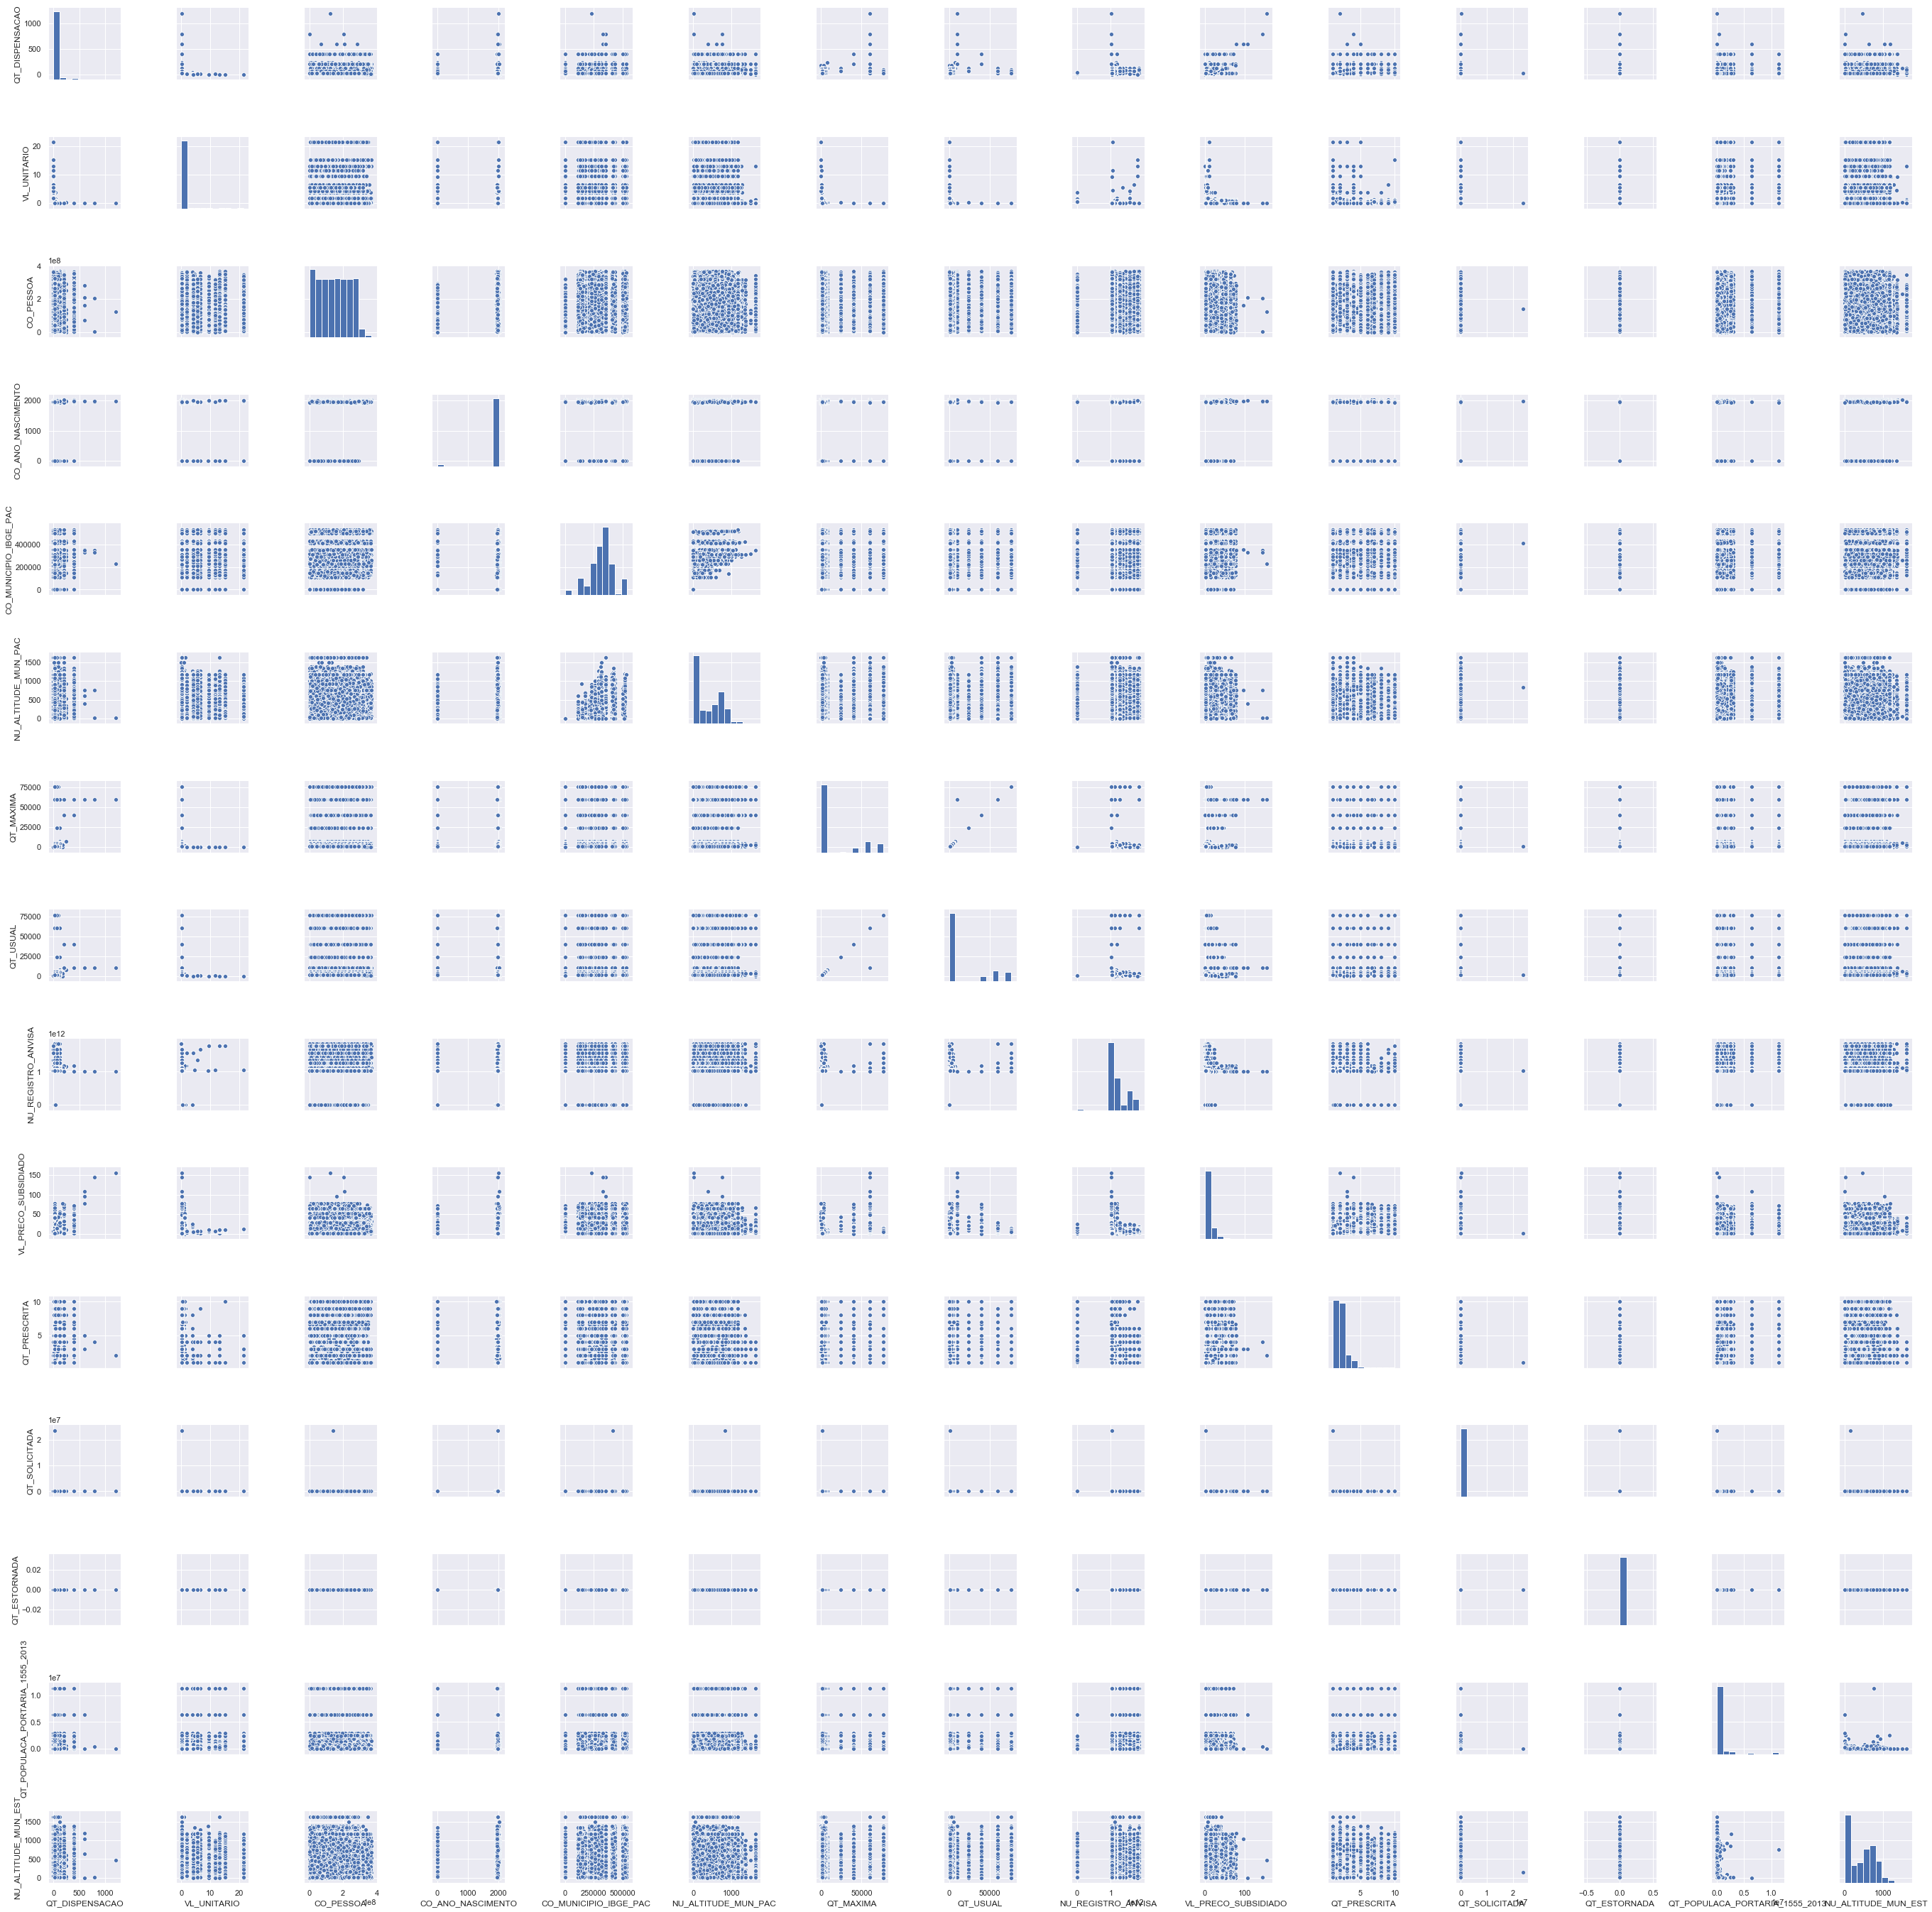

In [4]:
sns.pairplot(data);

In [ ]:
from sklearn.cluster import KMeans
import numpy as np



kmeans = KMeans(n_clusters=7, random_state=0).fit(data)

